### 对数几率回归

In [1]:
# 1 加载数据
from numpy import *

def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

In [2]:
# 2.sigmoid
def sigmoid(inX):
    return 1.0/(1+exp(-inX))

In [3]:
# 3. 梯度下降算法（所有的样本）
def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)              # convert to NumPy matrix
    labelMat = mat(classLabels).transpose()  # convert to NumPy matrix
    m, n = shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = ones((n,1))
    for k in range(maxCycles):              # heavy on matrix operations
        h = sigmoid(dataMatrix*weights)     # matrix mult
        error = (labelMat - h)              # vector subtraction
        weights = weights + alpha * dataMatrix.transpose()* error  # matrix mult
    return weights

In [4]:
# 画出拟合曲线
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat, labelMat=loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0] 
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

In [7]:
# 随机梯度下降法， 按照顺序一个一个
def stocGradAscent0(dataMatrix, classLabels):
    m, n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)   #initialize to all ones
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

In [22]:
# 随机梯度下降法， 随机样本, 修改学习率
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = shape(dataMatrix)
    weights = ones(n)   # initialize to all ones
    for j in range(numIter):
        dataIndex = range(m)
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.0001    # apha decreases with iteration, does not 
            randIndex = int(random.uniform(0,len(dataIndex)))  # go to 0 because of the constant
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            # del(dataIndex[randIndex])
    return weights

In [8]:
# 分类器
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5: 
        return 1.0
    else:
        return 0.0

In [9]:
# 测试分类器
def colicTest():
    frTrain = open('horseColicTraining.txt')
    frTest = open('horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(array(trainingSet), trainingLabels, 1000)
    errorCount = 0
    numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr), trainWeights)) != int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    print("the error rate of this test is: %f" % errorRate)
    return errorRate

In [29]:
# 平均测试
def multiTest():
    numTests = 10; errorSum=0.0
    for k in range(numTests):
        errorSum += colicTest()
    print("after %d iterations the average error rate is: %f" % (numTests, errorSum/float(numTests)))

### 调用

In [10]:
dataArr, labelMat = loadDataSet()
print(dataArr, labelMat)

[[1.0, -0.017612, 14.053064], [1.0, -1.395634, 4.662541], [1.0, -0.752157, 6.53862], [1.0, -1.322371, 7.152853], [1.0, 0.423363, 11.054677], [1.0, 0.406704, 7.067335], [1.0, 0.667394, 12.741452], [1.0, -2.46015, 6.866805], [1.0, 0.569411, 9.548755], [1.0, -0.026632, 10.427743], [1.0, 0.850433, 6.920334], [1.0, 1.347183, 13.1755], [1.0, 1.176813, 3.16702], [1.0, -1.781871, 9.097953], [1.0, -0.566606, 5.749003], [1.0, 0.931635, 1.589505], [1.0, -0.024205, 6.151823], [1.0, -0.036453, 2.690988], [1.0, -0.196949, 0.444165], [1.0, 1.014459, 5.754399], [1.0, 1.985298, 3.230619], [1.0, -1.693453, -0.55754], [1.0, -0.576525, 11.778922], [1.0, -0.346811, -1.67873], [1.0, -2.124484, 2.672471], [1.0, 1.217916, 9.597015], [1.0, -0.733928, 9.098687], [1.0, -3.642001, -1.618087], [1.0, 0.315985, 3.523953], [1.0, 1.416614, 9.619232], [1.0, -0.386323, 3.989286], [1.0, 0.556921, 8.294984], [1.0, 1.224863, 11.58736], [1.0, -1.347803, -2.406051], [1.0, 1.196604, 4.951851], [1.0, 0.275221, 9.543647], [1.0,

In [14]:
weights = gradAscent(dataArr, labelMat)  # w0, w1, w2
print(weights)

[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


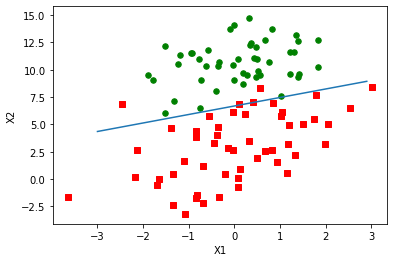

In [16]:
plotBestFit(weights.getA())

In [18]:
weights = stocGradAscent0(array(dataArr), labelMat)
print(weights)

[ 1.01702007  0.85914348 -0.36579921]


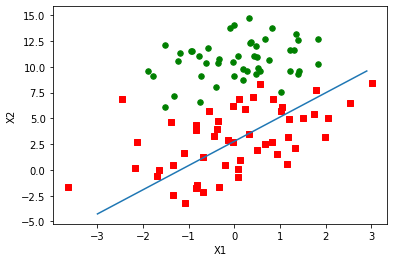

In [20]:
plotBestFit(weights)

In [23]:
weights = stocGradAscent1(array(dataArr), labelMat)
print(weights)

[13.79091898  0.88584646 -1.8314571 ]


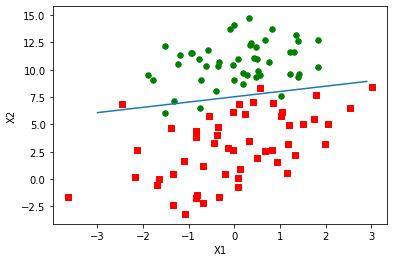

In [24]:
plotBestFit(weights)

### 实战 疝气病预测马的死亡率 

In [25]:
colicTest()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


the error rate of this test is: 0.268657


0.26865671641791045

In [30]:
multiTest()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


the error rate of this test is: 0.313433
the error rate of this test is: 0.417910
the error rate of this test is: 0.268657
the error rate of this test is: 0.253731
the error rate of this test is: 0.313433
the error rate of this test is: 0.477612
the error rate of this test is: 0.283582
the error rate of this test is: 0.343284
the error rate of this test is: 0.343284
the error rate of this test is: 0.417910
after 10 iterations the average error rate is: 0.343284
